Ionbot identifications of different ionbot versions are compared to see whether this contributes to bias

In [1]:
import pandas as pd
from collections import defaultdict
import mysql.connector
import glob
import os
import csv
import numpy as np
from master_functions import dbf
pd.set_option('display.max_columns', 65)
db_f = dbf()

connection succesfull


In [2]:
def find_pxd_path(pxds: list, return_path = False):
        '''Given a list of pxds, this function searches the compomics directories for the pxd directory and returns the pxds it finds
        
        If return path is set to True, returns (x,y,z)
        
        - x = list of pxd that were found
        - y = dictionary of path: amount of files
        - z = ionbot version paths'''
        
        path_found = []
        version_path = []
        file_output = {}
        pxd_found = []
        for pxd in pxds:
            for path in glob.glob("/home/compomics/mounts/*/*/PRIDE_DATA/" + str(pxd)):
                
                pxd_found.append(pxd)
                path_found.append(path)
        
        flag = False
        for path in path_found:
            count = 0
            for version in glob.glob(path + '/IONBOT_v*/*'):
                if count == 0:
                    version_path.append("/".join(version.split('/')[0:-1]))
                count += 1
            
            file_output[path] = count

        print(f"Found {len(pxd_found)} out of {len(pxds)}.")
        if not return_path:
            return pxd_found
        return pxd_found, file_output, version_path

In [3]:
pxd_dir = glob.glob("/home/compomics/mounts/*/*/PRIDE_DATA/*/*")

In [4]:
versions = [version.split("/")[-1] for version in pxd_dir]

In [59]:
set(versions)

{'IONBOT',
 'IONBOT_v0.10.0',
 'IONBOT_v0.10.0_npi',
 'IONBOT_v0.3.0',
 'IONBOT_v0.6.0',
 'IONBOT_v0.6.2',
 'IONBOT_v0.6.3',
 'IONBOT_v0.7.0',
 'IONBOT_v0.8.0',
 'IONBOT_v0.9.0',
 'IONBOT_v0.9.6',
 'IONBOT_v0.9.9',
 'IONBOT_vtest',
 'MGF',
 'MGF_WITH_MS3',
 'PXD016001',
 'RAW',
 'RAW_COMPRESSED',
 'activation.txt',
 'assay_mapping.txt',
 'assay_mapping_back.txt',
 'metadata'}

In [5]:
pxds = {}
ionbot_versions = ['IONBOT_v0.6.0',
 'IONBOT_v0.6.2',
 'IONBOT_v0.6.3',
 'IONBOT_v0.7.0',
 'IONBOT_v0.8.0',
 'IONBOT_v0.9.0',]

for path in pxd_dir:
    path_split = path.split("/")

    if path_split[-1] in ionbot_versions:
        if path_split[-2] not in list(pxds.keys()):
            pxds[path_split[-2]] = [path_split[-1]]
        else:
            pxds[path_split[-2]].append(path_split[-1])
    

In [6]:
multiple_version_pxd = []
for pxd, versions in pxds.items():
    if len(versions) > 1:
        multiple_version_pxd.append(pxd)

In [7]:
len(multiple_version_pxd)

719

In [7]:
multiple_version_paths = []
for x,y in pxds.items():
    if len(y)>1:
        for y_ in y:
            multiple_version_paths.append(x+"/"+y_)

In [9]:
len(multiple_version_paths)

1887

In [11]:
multiple_version_paths[:10]

['PXD000272/IONBOT_v0.7.0',
 'PXD000272/IONBOT_v0.8.0',
 'PXD000272/IONBOT_v0.6.2',
 'PXD000288/IONBOT_v0.7.0',
 'PXD000288/IONBOT_v0.8.0',
 'PXD000288/IONBOT_v0.6.2',
 'PXD005312/IONBOT_v0.7.0',
 'PXD005312/IONBOT_v0.6.2',
 'PXD000892/IONBOT_v0.7.0',
 'PXD000892/IONBOT_v0.8.0']

In [8]:
def find_common_files(pxd_versions):
    path_found = []

    raw_file_paths = {}
    version_path = []
    file_output = {}

    for pxd_version in pxd_versions:
        for path in glob.glob("/home/compomics/mounts/*/*/PRIDE_DATA/" + pxd_version):
            path_found.append(path)
    
    return path_found
   

In [9]:
for p in glob.glob('/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/*'):
    
    if p.split("/")[-1][-10:] != "ionbot.csv":
        for ps in glob.glob(p+"/*"):
            
            if ps.split("/")[-1][-10:] == "ionbot.csv":
                print(ps)
    else:
        print(p)

/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/091204_20_SM_TMT1_12_M.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/100215_06_SM_TMT2_5_R.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/091204_12_SM_TMT1_5_M.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/100215_03_SM_TMT2_2_R.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/100215_09_SM_TMT2_7_R.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/091204_13_SM_TMT1_6_M.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/091204_15_SM_TMT1_7_M.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/100215_12_SM_TMT2_10_R.mgf.ionbot.csv
/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2/100215_11_SM_TMT2_9_R.mgf.ionbot.csv

In [10]:
def find_common_files2(paths):
    
    raw_file_paths = {}
    
    for path in paths:
        
        for version in glob.glob(path+'/*'):
            
            pxd_ = version.split("/")[7]
            raw_name = version.split("/")[-1]
            
            if raw_name[-10:] != 'ionbot.csv':
                for version2 in glob.glob(version+"/*"):
                    raw_name2 = version2.split("/")[-1]
                    
                    if raw_name2[-10:] == 'ionbot.csv':
                        if pxd_ not in raw_file_paths.keys():
                            raw_file_paths[pxd_] = [version2]
                        else:
                            raw_file_paths[pxd_].append(version2)
            
            else:
                if pxd_ not in raw_file_paths.keys():
                    raw_file_paths[pxd_] = [version]
                else:
                    raw_file_paths[pxd_].append(version)

    return raw_file_paths

In [11]:
paths_mv = find_common_files(multiple_version_paths)

In [12]:
raw_file_paths = find_common_files2(paths_mv)

In [20]:
raw_file_paths['PXD000272'][:5]

['/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0/091204_08_SM_TMT1_1_M.mgf.gzip/091204_08_SM_TMT1_1_M.mgf.gzip.ionbot.csv',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0/091204_11_SM_TMT1_4_M.mgf.gzip/091204_11_SM_TMT1_4_M.mgf.gzip.ionbot.csv',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0/100215_02_SM_TMT2_1_R.mgf.gzip/100215_02_SM_TMT2_1_R.mgf.gzip.ionbot.csv',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0/100215_12_SM_TMT2_10_R.mgf.gzip/100215_12_SM_TMT2_10_R.mgf.gzip.ionbot.csv',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0/100215_09_SM_TMT2_7_R.mgf.gzip/100215_09_SM_TMT2_7_R.mgf.gzip.ionbot.csv']

In [13]:
duplicates = []

for pxd, result_paths in raw_file_paths.items():
    results = []
    for result in result_paths:
        result = result.split("/")[-1]
        
        if result in results:
            duplicates.append(result)
        results.append(result)
    
    if len(results) == len(set(results)):
        continue

In [14]:
duplicated_file = {}
for pxd, result_paths in raw_file_paths.items():    
    for result_path in result_paths:
        result = result_path.split("/")[-1]
        if result in list(set(duplicates)):
            if result not in duplicated_file.keys():
                duplicated_file[result] = [result_path]
            else:
                duplicated_file[result].append(result_path)

In [23]:
len(duplicated_file)

35210

In [15]:
multiple_version_projects = '''PXD000533
PXD000529
PXD000443
PXD000426
PXD002842
PXD008719
PXD001352
PXD007543
PXD008996
PXD006035
PXD001327
PXD006591
PXD003406
PXD003407
PXD002057
PXD000661
PXD007759
PXD008381
PXD009149
PXD005045
PXD010538
PXD009442
PXD009560
PXD003252
PXD008693'''.split("\n")

multiple_version_files = {}
pxd_duplicated = []
for k,v in duplicated_file.items():
    if v[0].split("/")[7] in multiple_version_projects:
        multiple_version_files[k] = v

In [25]:
len(multiple_version_files)

1467

In [29]:
pd.read_csv('/home/compomics/mounts/conode54/pride/PRIDE_DATA/PXD010538/IONBOT_v0.6.2/160923_A12_FullProteome2_NOS_22_supernatant_SF_SCX3.mgf.ionbot.csv')

,title,scan_id,psm_id,scan_psm_id,matched_peptide,modifications,DB,ionbot_score,best_psm,charge,numpeaks,num_candidates,num_filtered_candidates,num_passed,precursor_mass,pepmass,rt,rt_A,rt_predicted,rt_diff_A,prec_error,best_tag_rank,pcb,pcy,pcb2,pcy2,pcb3,pcy3,corr,unexpected_modification,proteins,percolator_psm_score,q_value,PEP,percolator_psm_score_best,q_value_best,PEP_best
0,160923_A12_FullProteome2_NOS_22_supernatant_SF...,1,4,1_4,THTGERPYYCTEPGCGR,10|[4]carbamidomethyl[C]|15|[4]carbamidomethyl[C],T,0.383,1,3,8,120,12,2,2040.667,2039.858,5.335,391.867,886.923,495.056,80963.0,20,1,0,0,0,0,0,0.716,NaN,sp|P52747|ZN143_HUMAN((350-367))||tr|E7EN86|E7...,-0.786,0.706,1.000,-1.195,0.275,1.000
1,160923_A12_FullProteome2_NOS_22_supernatant_SF...,1,10,1_10,HTTCNSSENFAKGYEECK,NaN,D,0.383,0,3,8,120,12,2,2040.667,2046.841,5.335,391.867,1168.514,776.647,617377.0,12,1,0,0,0,0,0,0.728,NaN,decoy_sp|Q6ZMV8|ZN730_HUMAN((286-304)),-0.867,0.759,1.000,-1.195,0.275,1.000
2,160923_A12_FullProteome2_NOS_22_supernatant_SF...,1000,1,1000_1,AQMPTPKAIDCRK,3|[35]oxidation[M]|11|[1003]EGCG2[C],T,0.102,0,2,222,52,13,5,1760.775,1760.799,739.635,739.635,883.992,144.357,0.0,2,3,2,1,1,0,2,0.761,[1003]EGCG2[C],sp|O75064|DEN4B_HUMAN((1476-1489)),-0.790,0.707,1.000,1.512,0.000,0.000
3,160923_A12_FullProteome2_NOS_22_supernatant_SF...,1000,3,1000_3,AQSGSDSSPEPKAPAPR,5|[40]Sulfo[S],T,0.282,0,2,222,52,13,5,1760.775,1760.763,739.635,778.946,883.643,104.697,0.0,7,2,9,1,3,0,0,0.749,[40]Sulfo[S],sp|Q9UQ35|SRRM2_HUMAN((1614-1631)),0.551,0.000,0.003,1.512,0.000,0.000
4,160923_A12_FullProteome2_NOS_22_supernatant_SF...,1000,4,1000_4,AQSGSDSSPEPKAPAPR,8|[40]Sulfo[S],T,0.268,1,2,222,52,13,5,1760.775,1760.763,739.635,739.635,1556.399,816.763,0.0,7,3,12,1,3,0,0,0.838,[40]Sulfo[S],sp|Q9UQ35|SRRM2_HUMAN((1614-1631)),0.883,0.000,0.000,1.512,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52831,160923_A12_FullProteome2_NOS_22_supernatant_SF...,9998,7,9998_7,DGEQIEQEEDDEKYIFSDDSSQLTIK,NaN,T,0.209,1,3,173,50,12,2,3060.359,3060.357,2169.009,2113.831,2119.675,5.844,228.0,0,3,11,0,0,2,0,0.875,NaN,sp|P13591|NCAM1_HUMAN((250-276))||tr|A0A087WV7...,1.307,0.000,0.000,1.831,0.000,0.000
52832,160923_A12_FullProteome2_NOS_22_supernatant_SF...,9998,9,9998_9,EQIKEQIAEGVEHQNEYFYACDIHR,25|[1009]Thiazolidine[R],D,0.101,0,3,173,50,12,2,3060.359,3060.403,2169.009,2169.009,2108.540,60.469,0.0,7,5,1,1,0,3,0,0.481,[1009]Thiazolidine[R],decoy_sp|C9JRZ8|AK1BF_HUMAN((253-278)),-0.622,0.540,1.000,1.831,0.000,0.000
52833,160923_A12_FullProteome2_NOS_22_supernatant_SF...,9999,5,9999_5,LDNILLDAEGHCK,13|[726]Ethylphosphate[K],T,0.270,0,2,153,394,15,3,1547.704,1547.705,2169.190,2169.190,1716.654,452.536,0.0,6,4,0,0,0,0,0,0.933,[726]Ethylphosphate[K],sp|Q02156|KPCE_HUMAN((535-548)),-0.725,0.655,1.000,-0.732,0.147,0.984
52834,160923_A12_FullProteome2_NOS_22_supernatant_SF...,9999,7,9999_7,GIPNMLLSEEETES,NaN,T,0.245,1,2,153,394,15,3,1547.704,1547.703,2169.190,2169.190,2259.580,90.390,185.0,20,4,3,0,0,0,0,0.448,NaN,sp|Q9UI30|TR112_HUMAN((112-126))||tr|F5GYQ2|F5...,-0.705,0.639,1.000,-0.732,0.147,0.984


In [16]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',database='expression_atlas_cells')
mycursor = conn.cursor(buffered = True)

# check the connection
if conn.is_connected():
    print("connection succesfull")
else:
    print("no connection")

connection succesfull


In [17]:
pepsql = "SELECT peptide_id, peptide_sequence FROM peptide"
pepData = pd.read_sql_query(pepsql, conn)

protsql = "SELECT peptide_id, uniprot_id FROM peptide_to_protein"
protData = pd.read_sql_query(protsql, conn)

pep_protData = pd.merge(protData, pepData, on = "peptide_id")

seqsql = "SELECT * FROM protein WHERE length IS NOT NULL"
seqData = pd.read_sql_query(seqsql, conn)
seqData["length"] = pd.to_numeric(seqData['length'], errors = "coerce")

pep_protData = pd.merge(pep_protData, seqData, on = "uniprot_id")

proteotypicData = pep_protData.loc[:,"peptide_id uniprot_id".split()].groupby("peptide_id").filter(lambda x: len(x) == 1)

# Check for protein identifiers that do not match the uniprot id regex.
proteotypicData = proteotypicData.copy()
contaminants = proteotypicData[proteotypicData.uniprot_id.str.contains(pat = r"[-_|]")].uniprot_id.unique().tolist()
print(contaminants[:5])

# From the cRAP https://www.thegpm.org/crap/index.html database, common contaminant identifiers were extracted
CRAP = pd.read_csv("CRAP.tsv", sep="\t")
CRAP["uniprot_id"] = CRAP.Description.apply(lambda x: x[1:7])

# All the failed uniprot ids are CRAP so delete them from the proteotypicData data structure

uniprot_parser_failed = {"AMYS_HUMAN|":     "/",        # Not found in uniprot
                         "ANT3_HUMAN|":     "P01008",   # Antithrombin-III
                         "B2MG_HUMAN|":     "P61769",   # Beta-2-microglobulin
                         "BID_HUMAN|":      "P55957",   # BH3-interacting domain death agonist
                         "CATG_HUMAN|":     "P08311",   # Cathepsin G
                         "GELS_HUMAN|":     "P06396",   # Gelsolin
                         "HBB_HUMAN|":      "P68871",   # Hemoglobin subunit beta
                         "H-INV":           "/",        # Not found
                         "IGF2_HUMAN|":     "P01344",   # Insulin-like growth factor II
                         'K1C9_HUMAN|':     'P35527',   # Keratin, type I cytoskeletal 9
                         'K1H2_HUMAN|':     "Q14532",   # Keratin, type I cuticular Ha2
                         'K1H4_HUMAN|':     "O76011",   # Keratin, type I cuticular Ha4
                         'K1H5_HUMAN':      "Q92764",   # Keratin, type I cuticular Ha5
                         'K1H5_HUMAN|':     "Q92764",   # Keratin, type I cuticular Ha5,
                         'K1H8_HUMAN|':     "O76015",   # Keratin, type I cuticular Ha8
                         'K1HA_HUMAN|':     'O76009',   # Keratin, type I cuticular Ha3-I
                         "K1H6_HUMAN|":     "O76013",   # Keratin, type I cuticular Ha6
                         "K1HB_HUMAN|":     "Q14525",   # Keratin, type I cuticular Ha3-II
                         "KCRM_HUMAN|":     "P06732",   # Creatine kinase M-type
                         "KRHB4_HUMAN|":    "Q9NSB2",   # Keratin, type II cuticular Hb4
                         'KRHB3_HUMAN|':    "P78385",   # Keratin, type II cuticular Hb3
                         'KRHB4_HUMAN':     "Q9NSB2",   # Keratin, type II cuticular Hb4,
                         'KRHB5_HUMAN|':    "P78386",   # Keratin, type II cuticular Hb5
                         'LALBA_HUMAN|':    "P00709",   # Alpha-lactalbumin
                         'LEP_HUMAN|':      "P41159",   # Leptin
                         "LYSC_HUMAN|":     "P61626",   # Lysozyme C
                         'NEDD8_HUMAN|':    "Q15843",   # NEDD8
                         'NQO2_HUMAN|':     "P16083",   # Ribosyldihydronicotinamide dehydrogenase [quinone]
                         "P01045-1":        "P01045",   # canonical sequence of Kininogen-2, a BOVINE protein
                         "P02535-1":        "P02535",   # Canonical sequence of Keratin, the MOUSE protein
                         "P08730-1":        "P08730",   # Another MOUSE keratin protein
                         "P13646-1":        "P13646",   # Human keratin
                         'PPIA_HUMAN':      "P62937",   # Peptidyl-prolyl cis-trans isomerase A
                         'PPIA_HUMAN|':     "P62937",   # Peptidyl-prolyl cis-trans isomerase A
                         "RASH_HUMAN|":     "P01112",   # GTPase HRas
                         'RS27A_HUMAN|':    "P62979",   # Ubiquitin-40S ribosomal protein S27a
                         'TAU_HUMAN':       "P10636",   # Microtubule-associated protein tau
                         'TNFA_HUMAN|':     "P01375",   # Tumor necrosis factor
                         "UBE2C_HUMAN|":    "O00762"}   # Ubiquitin-conjugating enzyme E2 C

# Convert the non-standard identifiers
for key, parser_id in uniprot_parser_failed.items():
    if parser_id not in CRAP.uniprot_id.unique().tolist():
        print(key)

def status_protein(protein_id):
    if protein_id in list(uniprot_parser_failed.values()):
        return 'contaminant'
    if protein_id in CRAP.uniprot_id.unique().tolist():
        return 'contaminant'
    else:
        return 'identification'

proteotypicData["parsed_uniprot"] = proteotypicData.uniprot_id.apply(lambda x: uniprot_parser_failed[x] if x in list(uniprot_parser_failed.keys()) else x)
proteotypicData["status"] = proteotypicData.parsed_uniprot.apply(status_protein)

# Reformat
proteotypicData.drop("uniprot_id", axis = 1, inplace = True)
proteotypicData.rename(columns={"parsed_uniprot":"uniprot_id"},inplace=True)

proteotypicData = proteotypicData[~(proteotypicData.status == "contaminant")]
proteotypicData = proteotypicData.loc[:, "peptide_id uniprot_id".split()]
proteotypicData = pep_protData[pep_protData.peptide_id.isin(proteotypicData.peptide_id.unique())]
print(proteotypicData.shape)
proteotypicData = proteotypicData.groupby("uniprot_id").filter(lambda x: len(x) > 2)
print(proteotypicData.shape)

[]
AMYS_HUMAN|
H-INV
P01045-1
P02535-1
P08730-1
P13646-1
(468922, 6)
(465394, 6)


In [18]:
def compare_files(file_paths):
    
    versions_order = []
    spcs = []
    unique_pep_seq = []
    peptide_counts = {}
    
    for file_path in file_paths:
        
        
        parser = db_f.ionbot_parse(file_path, file_path.split("/")[8])

        if parser is False:
            continue

        if file_path.split("/")[8] in versions_order:
            continue
        
        versions_order.append(file_path.split("/")[8])
        df_val, spc = parser

        spcs.append(spc)
        unique_pep_seq = list(set(unique_pep_seq + list(spc.keys())))
    
    if len(spcs) < 2:
        return False

    for pep_seq in unique_pep_seq:

        peptide_counts[pep_seq] = []

        for spc in spcs:
            if pep_seq in spc.keys():
                peptide_counts[pep_seq] += [spc[pep_seq]]
            else:
                peptide_counts[pep_seq] += [0]

    peptide_counts = pd.DataFrame.from_dict(data=peptide_counts, orient = "index", columns=versions_order)
    peptide_counts = peptide_counts.reset_index().rename(columns={"index": "peptide_sequence"})

    peptide_counts = pd.merge(pep_protData, peptide_counts, on = "peptide_sequence")
    peptide_counts = peptide_counts.loc[:, "peptide_sequence uniprot_id length".split()+versions_order].groupby("uniprot_id").sum().reset_index()

    for v in versions_order:
        peptide_counts.insert(loc=2, column="SAF_"+v, value=0)
        peptide_counts.insert(loc=2, column="NSAF_"+v, value=0)
    
    sumsafs = {v: 0 for v in versions_order}
    for index, row in peptide_counts.iterrows():
        for sumsaf_i, v in enumerate(versions_order):
            saf = row[v]/row["length"]
            peptide_counts.loc[index, 'SAF_'+v] = saf
            sumsafs[v] += saf

    for v in versions_order:
        peptide_counts["NSAF_"+v] = peptide_counts["SAF_"+v] / sumsafs[v]

    cols = ["uniprot_id"] + ["NSAF_"+x for x in versions_order] + [x for x in versions_order]

    return peptide_counts.loc[:, cols], versions_order

In [29]:
multiple_version_files['3B5-2.mgf.gzip.ionbot.csv']

['/home/compomics/mounts/conode53/pride/PRIDE_DATA/PXD000533/IONBOT_v0.8.0/3B5-2.mgf.gzip/3B5-2.mgf.gzip.ionbot.csv',
 '/home/compomics/mounts/conode53/pride/PRIDE_DATA/PXD000533/IONBOT_v0.7.0/3B5-2.mgf.gzip/3B5-2.mgf.gzip.ionbot.csv']

In [19]:
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations

from ipywidgets import IntProgress
from IPython.display import display

In [20]:
f = IntProgress(min=0, max = len(multiple_version_files))
display(f)

# {filename: {combination(versions): pearsoncorrelation}}
metrics_comparison = {}

for filename, file_paths in multiple_version_files.items():
    output = compare_files(file_paths)

    if output is False:
        f.value += 1
        continue

    NSAF_ionbot, ionbot_versions = output

    ionbot_comparisons = combinations(ionbot_versions,2)

    metrics_comparison[filename] = {}

    for ionbot_comparison in ionbot_comparisons:
        v1 = ionbot_comparison[0]
        v2 = ionbot_comparison[1]

        pc = pearsonr(x=NSAF_ionbot.loc[:,"NSAF_"+v1], y = NSAF_ionbot.loc[:,"NSAF_"+v2])
        pc = (float(pc[0]), float(pc[1]))
        spectra1 = NSAF_ionbot.loc[:,v1].sum()
        spectra2 = NSAF_ionbot.loc[:,v2].sum()
        diff_spectra = sum(abs(NSAF_ionbot.loc[:,v1]-NSAF_ionbot.loc[:,v2]))

        metrics = [pc, int(spectra1), int(spectra2), int(diff_spectra)]

        metrics_comparison[filename]["-".join(ionbot_comparison)] = metrics

    f.value += 1

IntProgress(value=0, max=1467)

/home/compomics/Sam/git/python/master_thesis/Database/master_functions.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validated["proteins"] = df_validated.apply(lambda x: self.id_regex(x["proteins"]), axis = 1)
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
import json

In [22]:
with open("ionbot_version_comparison.json", "w") as outfile:
    json_object = json.dumps(metrics_comparison)
    outfile.write(json_object)

In [54]:
correlations = {}
spectra_diff = {}
spectra_diff_perc = {}
for filename_, output_ in metrics_comparison.items():
    for comp_, metrics_ in output_.items():
        if comp_ not in correlations.keys():
            correlations[comp_] = [metrics_[0][0]]
            spectra_diff[comp_] = [metrics_[3]]
            spectra_diff_perc[comp_] = [metrics[3]/max(metrics_[1], metrics_[2])]
            
        else:
            correlations[comp_].append(metrics_[0][0])
            spectra_diff[comp_].append(metrics_[3])
            spectra_diff_perc[comp_].append(metrics_[3]/max(metrics_[1], metrics_[2]))

In [55]:
correlations_ = list(correlations.values())[0] + list(correlations.values())[1]
spectra_diff_ = list(spectra_diff.values())[0] + list(spectra_diff.values())[1]
spectra_diff_perc_ = list(spectra_diff_perc.values())[0] + list(spectra_diff_perc.values())[1]

0.0 0.03636363636363636


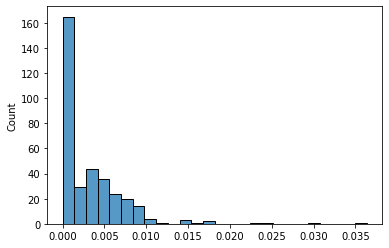

In [58]:
print(min(spectra_diff_perc_), max(spectra_diff_perc_))
sns.histplot(spectra_diff_perc_)

0 194


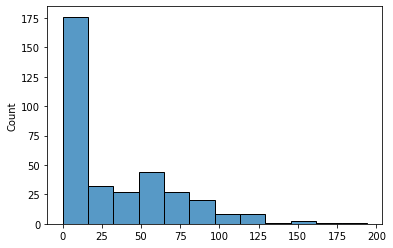

In [38]:
print(min(spectra_diff_), max(spectra_diff_))
sns.histplot(spectra_diff_)

0.9824674612080854 1.0


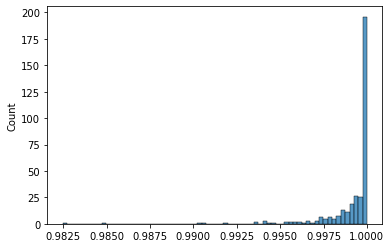

In [36]:
print(min(correlations_), max(correlations_))
sns.histplot(correlations_)

In [297]:
with open("ionbot_version_comparison.json", "r") as openfile:
    json_object = json.load(openfile)

In [298]:
json_object

{'3B5-2.mgf.gzip.ionbot.csv': {'IONBOT_v0.8.0-IONBOT_v0.7.0': [[0.9994292139062139,
    0.0],
   11516,
   11534,
   34]}}

In [290]:
float(metrics_comparison['3B5-2.mgf.gzip.ionbot.csv']['IONBOT_v0.8.0-IONBOT_v0.7.0'][0][0])

0.9994292139062139

In [138]:
for p in projects:
    if p in pxd_duplicated:
        print(p)

PXD000533
PXD000529
PXD000443
PXD000426
PXD002842
PXD008719
PXD001352
PXD007543
PXD008996
PXD006035
PXD001327
PXD006591
PXD003406
PXD003407
PXD002057
PXD000661
PXD007759
PXD008381
PXD009149
PXD005045
PXD010538
PXD009442
PXD009560
PXD003252
PXD008693


In [94]:
for path in glob.glob('/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0/*/*/*'):
    if path[-10] != "blub":
        print("blub")

In [87]:
paths_mv

['/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.8.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.6.2',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000288/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000288/IONBOT_v0.8.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000288/IONBOT_v0.6.2',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD005312/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD005312/IONBOT_v0.6.2',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000892/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000892/IONBOT_v0.8.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000892/IONBOT_v0.6.2',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD005666/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD005666/IO

In [78]:
version_files, raw_file_paths = find_version_files(multiple_version_paths)

ValueError: too many values to unpack (expected 2)

In [74]:
test = "/home/compomics/mounts/*/*/PRIDE_DATA/PXD"
test.split("/")[7]

'PXD'

In [60]:
pxd_found, file_output, version_path = find_pxd_path(multiple_version_pxd, return_path=True)

Found 777 out of 719.


In [83]:
version_path

['/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000272/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000288/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD005312/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000892/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD005666/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD005635/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000552/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD001641/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD004948/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD003356/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD002152/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD001346/IONBOT_v0.7.0',
 '/home/compomics/mounts/conode53/pride2/PRIDE_DATA/PXD000871/IO

---

In [3]:
meta = pd.read_csv("../Metadata/unified_metadata.csv")

In [137]:
projects

array(['PXD000533', 'PXD000529', 'PXD000443', 'PXD000426', 'PXD002842',
       'PXD008719', 'PXD001352', 'PXD007543', 'PXD005940', 'PXD004452',
       'PXD008996', 'PXD006035', 'PXD001327', 'PXD006591', 'PXD003406',
       'PXD003407', 'PXD002057', 'PXD000661', 'PXD007759', 'PXD018450',
       'PXD008381', 'PXD009149', 'PXD005045', 'PXD010538', 'PXD004182',
       'PXD004940', 'PXD001441', 'PXD003530', 'PXD006112', 'PXD004900',
       'PXD009442', 'PXD008222', 'PXD009560', 'PXD003252', 'PXD003668',
       'PXD008693', 'PXD018066', 'PXD016742', 'PXD017391', 'PXD001468',
       'PXD002613', 'PXD000612', 'PXD003903', 'PXD005912', 'PXD003790',
       'PXD005354'], dtype=object)

In [24]:
projects1 =  ['PXD004051', 'PXD006421', 'PXD005620', 'PXD002676', 'PXD001952', 'PXD007885', 'PXD007906', 'PXD021281', 'PXD006653', 'PXD002842', 'PXD003594', 'PXD006035', 'PXD008719', 'PXD001668', 'PXD009185', 'PXD005507', 'PXD001247', 'PXD007837', 'PXD008035', 'PXD001974', 'PXD002057', 'PXD008381', 'PXD010012', 'PXD005045', 'PXD009933', 'PXD002032', 'PXD010538', 'PXD006614', 'PXD009600', 'PXD009442', 'PXD010306', 'PXD009557', 'PXD009560', 'PXD003252', 'PXD003587', 'PXD007543', 'PXD008693', 'PXD003362', 'PXD011580', 'PXD010256', 'PXD000426', 'PXD009861', 'PXD006419', 'PXD008967', 'PXD000612', 'PXD001592', 'PXD003438', 'PXD004824', 'PXD014300', 'PXD018450', 'PXD018625', 'PXD017391', 'PXD018918', 'PXD011961', 'PXD013541', 'PXD018066', 'PXD016742', 'PXD014777', 'PXD017898', 'PXD014381', 'PXD016119', 'PXD015571', 'PXD009149']
projects2 = ['PXD000535', 'PXD001441','PXD001468','PXD001511','PXD002117','PXD002613','PXD003530','PXD003596','PXD003668','PXD003790','PXD003896','PXD003903','PXD004182','PXD004452','PXD004900','PXD004940','PXD005354','PXD005572','PXD005912','PXD005946','PXD005940','PXD005942','PXD006112','PXD009686','PXD013615','PXD008222','PXD000612','PXD001668','PXD001952','PXD001974','PXD002676','PXD004051','PXD005507','PXD006653','PXD009185']
projects3 = ['PXD000263',  'PXD022752',  'PXD029525',  'PXD011347',  'PXD033373',  'PXD003819',  'PXD005453',  'PXD014258',  'PXD003547',  'PXD031847',  'PXD022927', 'PXD014855',  'PXD018450',  'PXD003914',  'PXD014448',  'PXD029805',  'PXD005880',  'PXD017452',  'PXD028647']
tmt_projects = ['PXD020585',  'PXD020990',  'PXD034022',  'PXD023754',  'PXD015074',  'PXD016491',  'PXD018440',  'PXD022027',  'PXD023286',  'PXD030395',  'PXD033148',  'PXD014746', 'PXD014369',  'PXD028400',  'PXD030342',  'PXD019076',  'PXD017872',  'PXD005361',  'PXD022325',  'PXD031510', 'PXD016940',  'PXD017508',  'PXD020806']
LGSOC_TMT = "PXD019544"
lfq = list(set(projects1 + projects2 + projects3))

In [6]:
projects = meta.PXD_accession.unique()

In [25]:
len(lfq)

107

In [28]:
pxd_found, file_output, version_path = find_pxd_path(lfq, return_path=True)

Found 83 out of 107.


In [29]:
pxd_version = [x.split("/")[-2:] for x in version_path]

In [30]:
pxds= []
versions= []
for i, (x,y) in enumerate(pxd_version):
    
    if x in pxds:
        print(y, versions[i-1])
    
    pxds.append(x)
    versions.append(y)

    

IONBOT_v0.7.0 IONBOT_v0.7.0
IONBOT_v0.7.0 IONBOT_v0.7.0


In [31]:
pxds = []
for pxd in pxd_found:
    if pxd in pxds: 
        print(pxd)
        continue
    pxds.append(pxd)

PXD003438
PXD004824
